In [1]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import pandas as pd

In [2]:
df = pd.read_csv("D:/경기대/2학년_2학기/dna 동아리/23_겨울방학프로젝트/2022worldcup/player_passing.csv", encoding='utf-8')
df.head(3)

,player,position,team,age,birth_year,minutes_90s,passes_completed,passes,passes_pct,passes_total_distance,...,passes_pct_long,assists,xg_assist,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,170.0,217.0,78.3,2819.0,...,58.1,0,0.1,0.1,-0.1,1.0,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,88.0,112.0,78.6,1796.0,...,78.3,0,0.0,0.1,0.0,1.0,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,45.0,58.0,77.6,690.0,...,70.0,1,0.9,0.1,0.1,3.0,3.0,0.0,0.0,0.0


## 1. 전처리
#### (1) 선수 이름 확인
#### (2) 필요없는 열 삭제
#### (3) age 변수에 -뒤에 숫자 지우기
#### (4) 결측치 확인
#### (5) 출전시간 표기 변경 (예시 4.0 -> 360) 

In [4]:
cols = df.columns
cols

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'passes_completed', 'passes', 'passes_pct', 'passes_total_distance',
       'passes_progressive_distance', 'passes_completed_short', 'passes_short',
       'passes_pct_short', 'passes_completed_medium', 'passes_medium',
       'passes_pct_medium', 'passes_completed_long', 'passes_long',
       'passes_pct_long', 'assists', 'xg_assist', 'pass_xa', 'xg_assist_net',
       'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area',
       'crosses_into_penalty_area', 'progressive_passes'],
      dtype='object')

### (2) 필요없는 열 삭제

In [75]:
df = df.drop(columns=['xg_assist_net','pass_xa','xg_assist','passes_pct_short',
                      'passes_pct_medium','passes_pct_long','passes_pct'], axis=1)
df.head(3)

,player,position,team,age,birth_year,minutes_90s,passes_completed,passes,passes_total_distance,passes_progressive_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,170.0,217.0,2819.0,951.0,...,59.0,73.0,18.0,31.0,0,1.0,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,88.0,112.0,1796.0,339.0,...,27.0,35.0,18.0,23.0,0,1.0,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,45.0,58.0,690.0,122.0,...,7.0,13.0,7.0,10.0,1,3.0,3.0,0.0,0.0,0.0


### (3) age변수 - 뒤에 숫자 지우기

In [76]:
df['age'] = df['age'].str.split("-", expand=True)[0]

### (4) 결측치 확인

In [77]:
df.isnull().sum()

player                         0
position                       0
team                           0
age                            0
birth_year                     0
minutes_90s                    0
passes_completed               3
passes                         3
passes_total_distance          3
passes_progressive_distance    3
passes_completed_short         3
passes_short                   3
passes_completed_medium        3
passes_medium                  3
passes_completed_long          3
passes_long                    3
assists                        0
assisted_shots                 3
passes_into_final_third        3
passes_into_penalty_area       3
crosses_into_penalty_area      3
progressive_passes             3
dtype: int64

In [63]:
df[df['passes'].isnull()]

,player,position,team,age,birth_year,minutes_90s,passes_completed,passes,passes_total_distance,passes_progressive_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
268,Ismail Mohamad,FW,Qatar,32,1990,1.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
354,Kevin Rodríguez,FW,Ecuador,22,2000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
654,Yahya Jabrane,MF,Morocco,31,1991,0.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


#### 딱 보니 출전을 거의 안해서 해당 데이터가 없는 놈들임 -> 그냥 제거해도 무방할듯

In [78]:
df = df.dropna()

### (5) 출전시간 표기 변경

In [79]:
df['minutes_90s'] = df['minutes_90s'] * 90
df = df.rename(columns={'minutes_90s':'minutes'})
df.head(3)

,player,position,team,age,birth_year,minutes,passes_completed,passes,passes_total_distance,passes_progressive_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32,1990,360.0,170.0,217.0,2819.0,951.0,...,59.0,73.0,18.0,31.0,0,1.0,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31,1990,270.0,88.0,112.0,1796.0,339.0,...,27.0,35.0,18.0,23.0,0,1.0,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26,1996,180.0,45.0,58.0,690.0,122.0,...,7.0,13.0,7.0,10.0,1,3.0,3.0,0.0,0.0,0.0


## 2. EDA

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 679
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player                       677 non-null    object 
 1   position                     677 non-null    object 
 2   team                         677 non-null    object 
 3   age                          677 non-null    object 
 4   birth_year                   677 non-null    int64  
 5   minutes                      677 non-null    float64
 6   passes_completed             677 non-null    float64
 7   passes                       677 non-null    float64
 8   passes_total_distance        677 non-null    float64
 9   passes_progressive_distance  677 non-null    float64
 10  passes_completed_short       677 non-null    float64
 11  passes_short                 677 non-null    float64
 12  passes_completed_medium      677 non-null    float64
 13  passes_medium       

In [80]:
#이산형 기초통계량
df.describe()

,birth_year,minutes,passes_completed,passes,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000
mean,1994.918759,191.751846,82.471196,101.630724,1444.413589,484.301329,37.771049,42.243722,34.675037,39.754801,7.989660,14.285081,0.177253,1.586411,5.930576,1.333826,0.372230,5.135894
std,4.153941,147.799062,90.047133,102.477517,1625.587218,597.897520,41.550310,44.893905,43.759876,46.836826,10.045822,17.288022,0.487612,2.392108,8.250671,2.085650,0.830447,6.510290
min,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,72.000000,20.000000,28.000000,301.000000,70.000000,9.000000,11.000000,7.000000,9.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1995.000000,171.000000,52.000000,69.000000,841.000000,255.000000,24.000000,28.000000,19.000000,24.000000,4.000000,8.000000,0.000000,1.000000,3.000000,1.000000,0.000000,3.000000
75%,1998.000000,270.000000,110.000000,141.000000,2017.000000,676.000000,51.000000,57.000000,47.000000,56.000000,11.000000,20.000000,0.000000,2.000000,8.000000,2.000000,0.000000,7.000000
max,2004.000000,693.000000,642.000000,689.000000,12636.000000,3349.000000,281.000000,306.000000,416.000000,435.000000,55.000000,115.000000,3.000000,21.000000,71.000000,18.000000,6.000000,61.000000


In [82]:
#범주형 기초통계량 
df.describe(include='object')

,player,position,team,age
count,677,677,677,677
unique,677,4,32,22
top,Boualem Khoukhi,DF,Brazil,25
freq,1,228,26,72


In [104]:
#패스 거리는 너무 큰 값을 가질 수 밖에 없어서 일단 뺴놓음
df2 = df.drop(columns=['passes_total_distance', 'passes_progressive_distance'])
df2 = df2.filter(like='passes')

<AxesSubplot:>

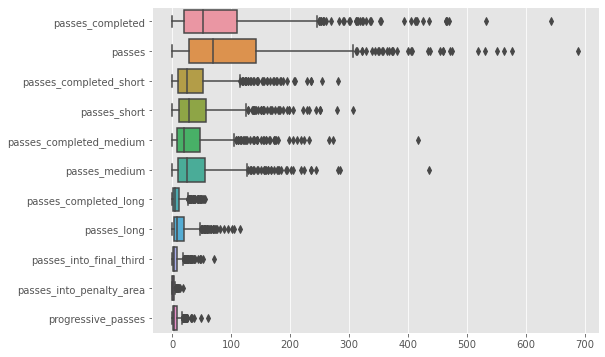

In [109]:
# change the figure size
plt.figure(figsize=(8,6))

sns.boxplot(data=df2, orient="h")

Text(0.5, 1.0, 'pass_type')

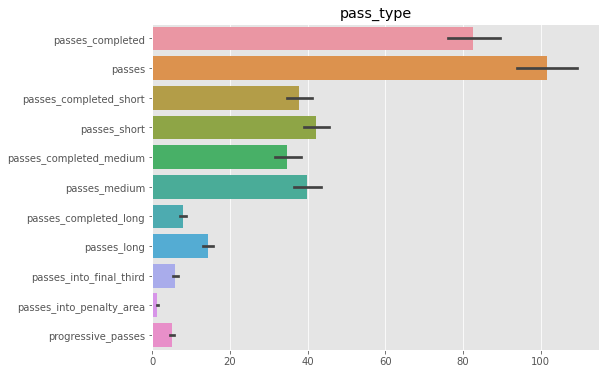

In [110]:
# change the figure size
plt.figure(figsize=(8,6))

sns.barplot(data=df2, orient="h").set_title("pass_type")

In [112]:
df['position'].value_counts()

DF    228
MF    225
FW    183
GK     41
Name: position, dtype: int64

<AxesSubplot:xlabel='position'>

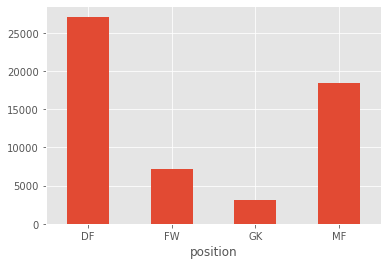

In [113]:
#포지션별 패스 성공 횟수에 차이를 보임 -> 다른 패스 관련 변수 역시 차이를 보일 것임

df.groupby('position')['passes_completed'].sum().plot.bar(rot=0)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minutes', ylabel='Density'>

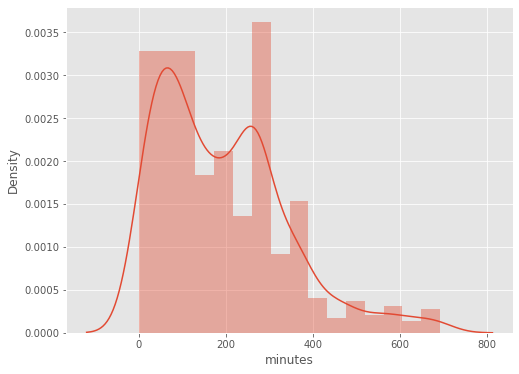

In [128]:
# change the figure size
plt.figure(figsize=(8,6))

sns.distplot(df['minutes'])

In [131]:
# 1사분위수보다 큰 애들로만 구성
df3 = df[df['minutes'] >= 72]

In [135]:
#그 중 수비수들만 보겠음
df4 = df3[df3['position'] == 'DF']

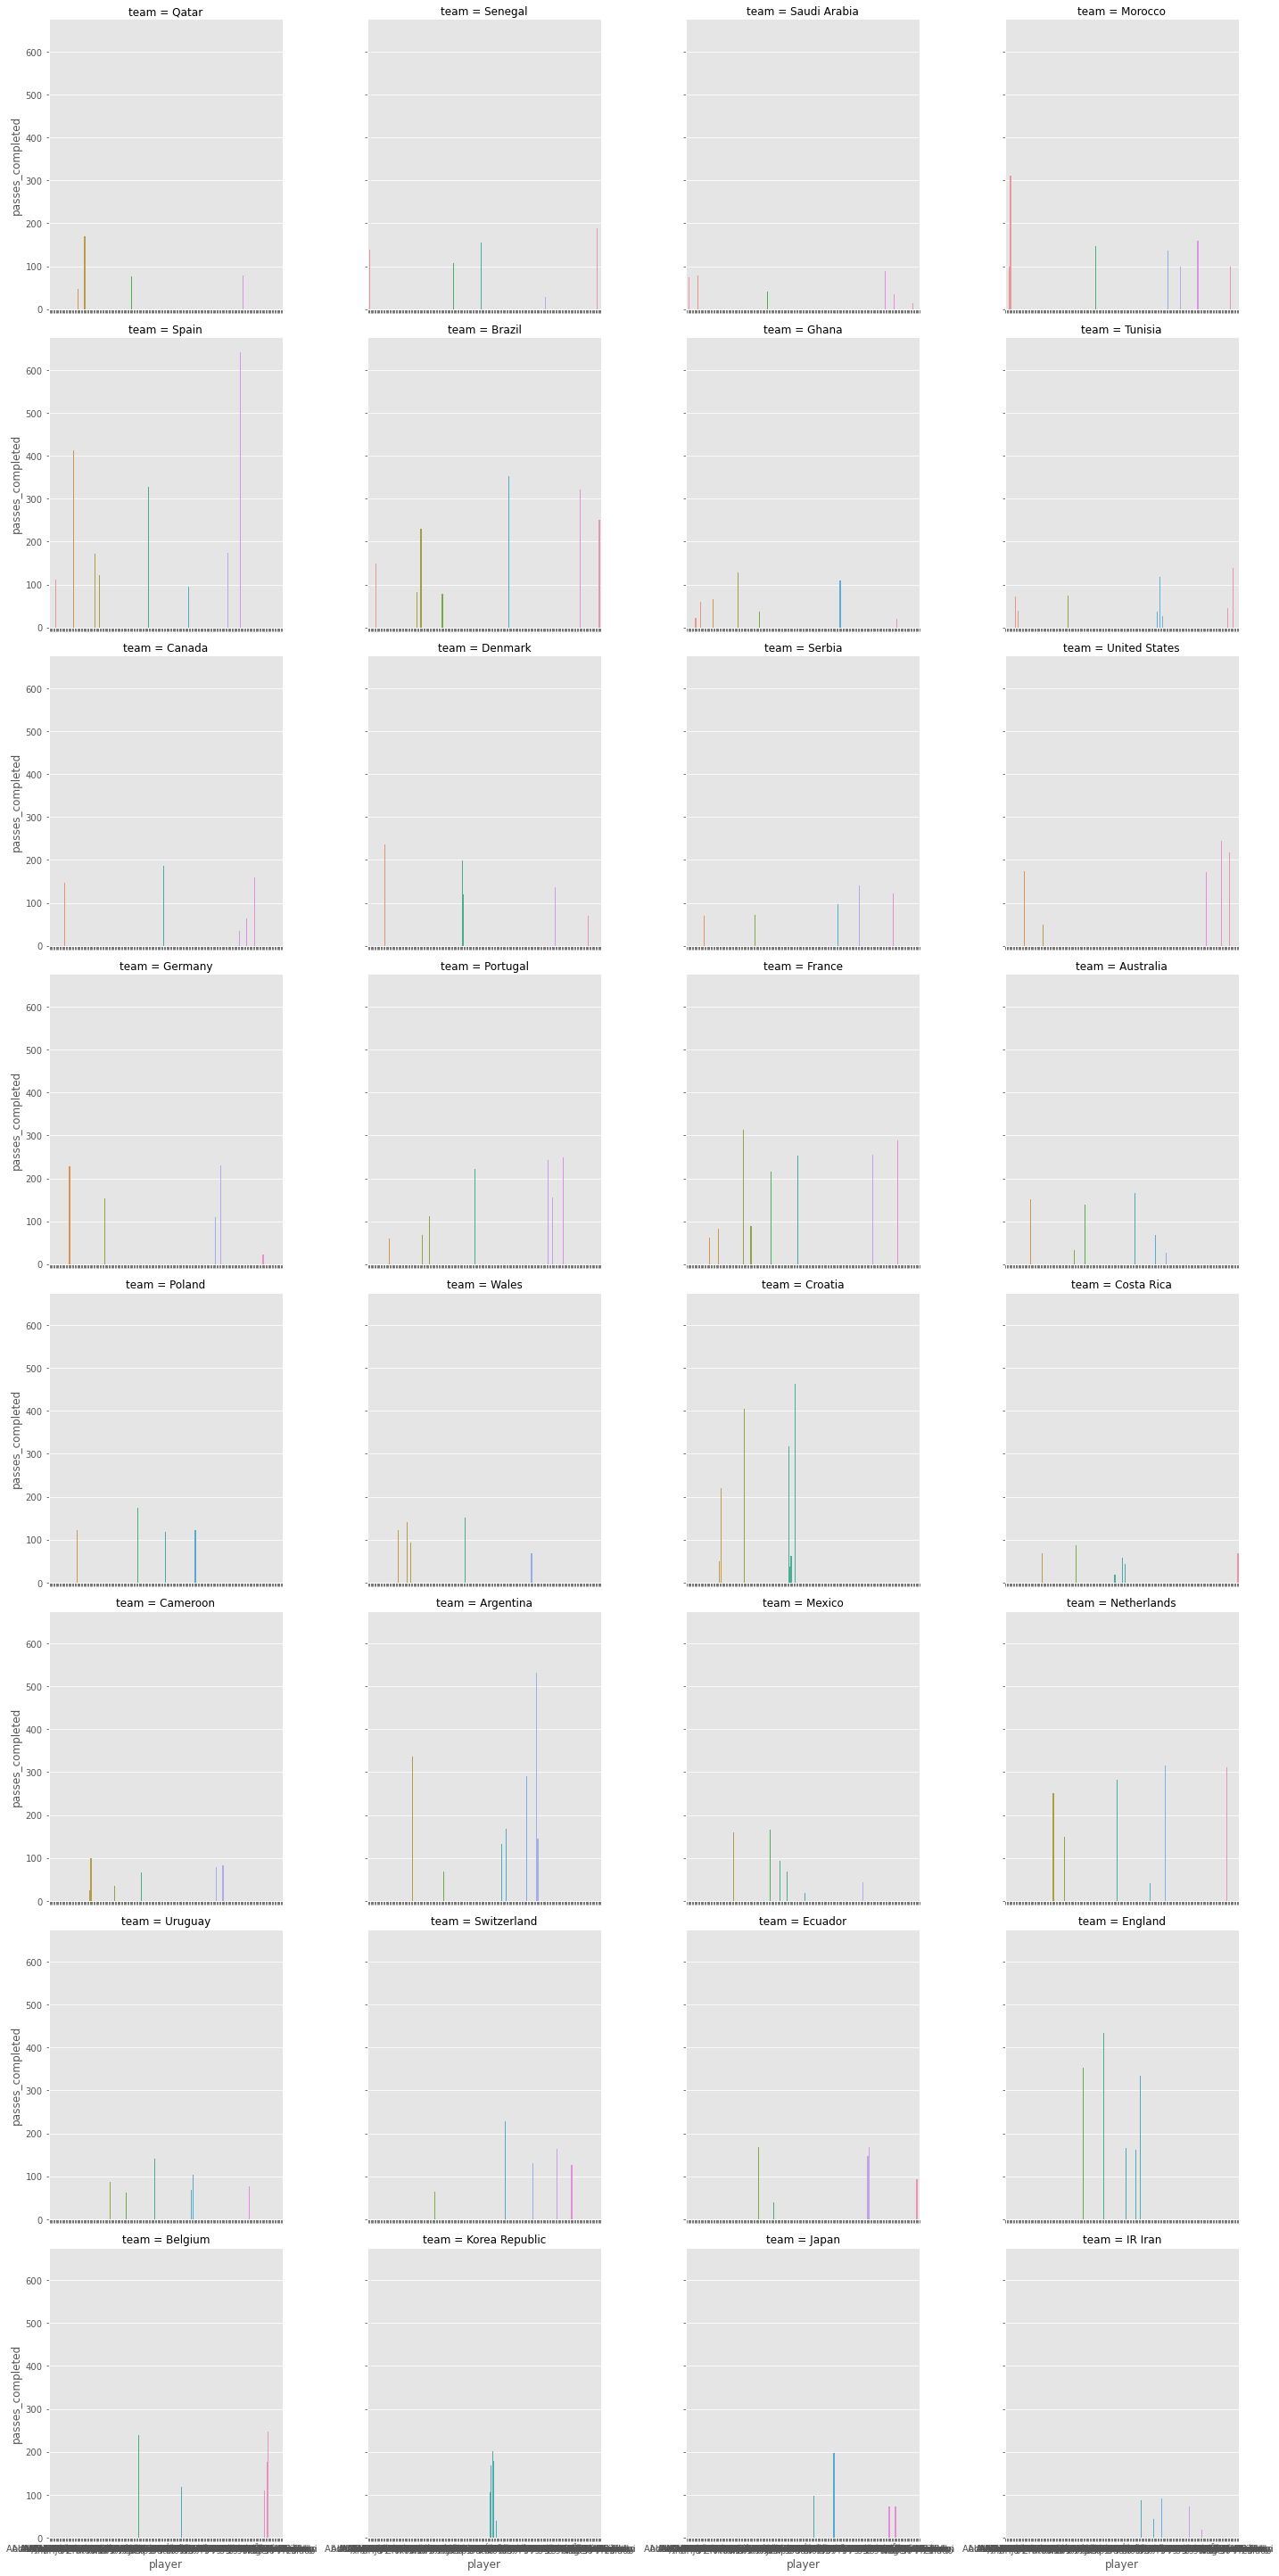

In [137]:
sns.catplot(data=df4, x='player', y='passes_completed', kind='bar',
           col='team', col_wrap=4)

In [138]:
df4.describe()

,birth_year,minutes,passes_completed,passes,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1994.666667,255.435484,141.564516,168.973118,2538.274194,861.876344,59.688172,65.290323,66.827957,75.381720,12.876344,22.268817,0.204301,1.306452,9.177419,1.360215,0.564516,7.672043
std,3.980584,130.492699,103.093758,112.606103,1906.238987,635.299496,44.597656,47.692955,57.304332,59.364923,10.079724,14.605545,0.477813,1.873762,8.192662,1.778043,1.094768,5.883093
min,1983.000000,72.000000,13.000000,24.000000,204.000000,76.000000,5.000000,6.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,155.250000,69.000000,90.250000,1212.250000,397.750000,28.000000,32.000000,28.000000,35.000000,6.000000,11.250000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000
50%,1995.000000,265.500000,119.000000,146.500000,2006.000000,685.500000,49.000000,54.000000,54.500000,62.000000,10.000000,19.000000,0.000000,1.000000,7.000000,1.000000,0.000000,6.000000
75%,1998.000000,339.750000,173.750000,208.750000,3305.000000,1122.500000,77.750000,84.750000,85.750000,97.500000,19.000000,29.750000,0.000000,2.000000,13.000000,2.000000,1.000000,11.000000
max,2003.000000,693.000000,642.000000,689.000000,12636.000000,3349.000000,236.000000,250.000000,416.000000,435.000000,55.000000,74.000000,2.000000,11.000000,46.000000,9.000000,5.000000,31.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='progressive_passes', ylabel='Density'>

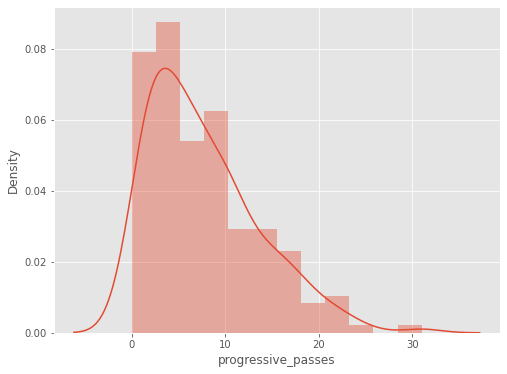

In [140]:
# change the figure size
plt.figure(figsize=(8,6))

sns.distplot(df4['progressive_passes'])

In [155]:
#패스 유형을 하나의 컬럼으로 통일

df5 = df.drop(columns=['passes_total_distance', 'passes_progressive_distance'])
df_melt = df5.melt(id_vars=['player','position','team','age','birth_year','minutes'],
                 var_name='pass_type',value_name='cnt')

In [144]:
df_melt

,player,position,team,age,birth_year,minutes,pass_type,cnt
0,Aaron Mooy,MF,Australia,32,1990,360.0,passes_completed,170.0
1,Aaron Ramsey,MF,Wales,31,1990,270.0,passes_completed,88.0
2,Abdelhamid Sabiri,MF,Morocco,26,1996,180.0,passes_completed,45.0
3,Abdelkarim Hassan,DF,Qatar,29,1993,270.0,passes_completed,122.0
4,Abderrazak Hamdallah,FW,Morocco,32,1990,72.0,passes_completed,8.0
...,...,...,...,...,...,...,...,...
10827,Ángel Di María,MF,Argentina,34,1988,288.0,progressive_passes,17.0
10828,Ángelo Preciado,DF,Ecuador,24,1998,261.0,progressive_passes,6.0
10829,Éder Militão,DF,Brazil,24,1998,351.0,progressive_passes,12.0
10830,Óscar Duarte,DF,Costa Rica,33,1989,270.0,progressive_passes,0.0


In [156]:
df_melt = df_melt[df_melt['minutes'] >= 72]

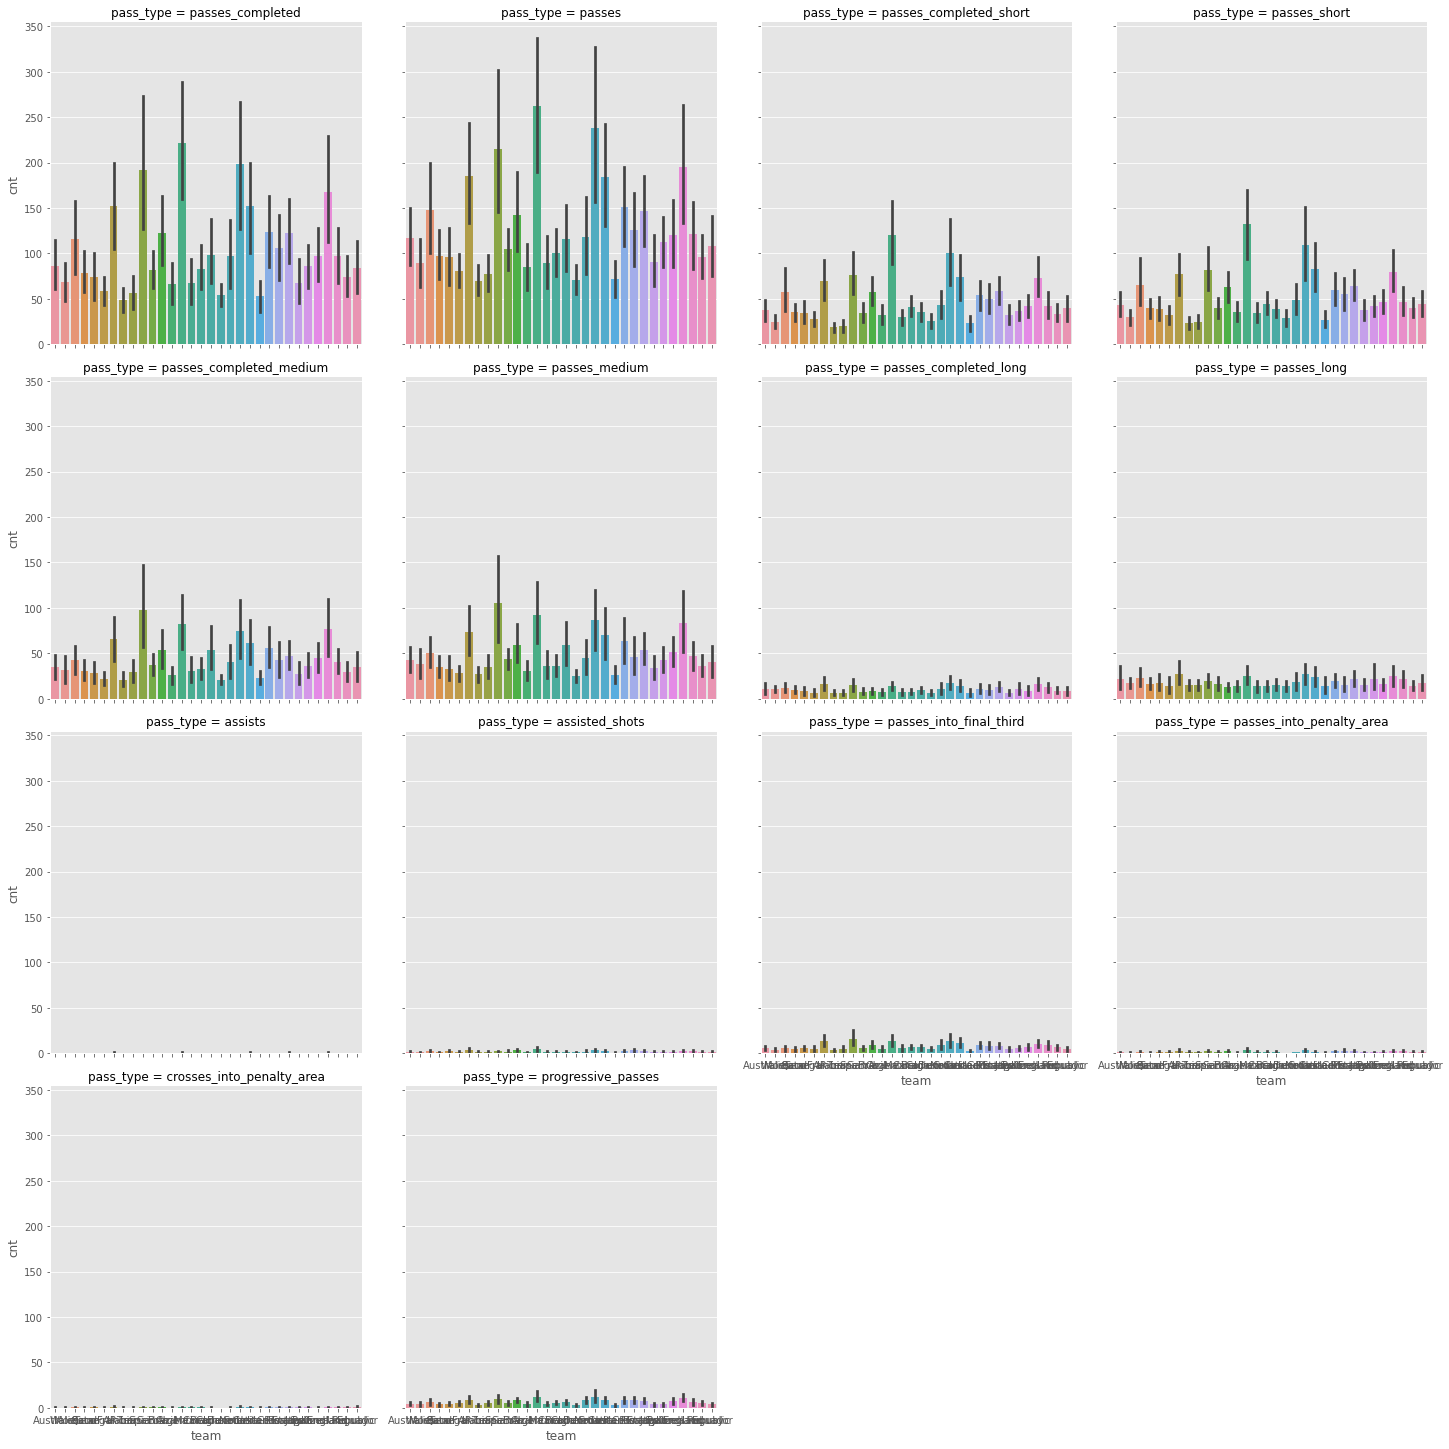

In [158]:
sns.catplot(data=df_melt, x="team", y="cnt", kind="bar", col="pass_type", col_wrap=4,
            )

In [159]:
df

,player,position,team,age,birth_year,minutes,passes_completed,passes,passes_total_distance,passes_progressive_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32,1990,360.0,170.0,217.0,2819.0,951.0,...,59.0,73.0,18.0,31.0,0,1.0,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31,1990,270.0,88.0,112.0,1796.0,339.0,...,27.0,35.0,18.0,23.0,0,1.0,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26,1996,180.0,45.0,58.0,690.0,122.0,...,7.0,13.0,7.0,10.0,1,3.0,3.0,0.0,0.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29,1993,270.0,122.0,161.0,2462.0,813.0,...,44.0,51.0,20.0,37.0,0,1.0,13.0,1.0,0.0,8.0
4,Abderrazak Hamdallah,FW,Morocco,32,1990,72.0,8.0,15.0,64.0,11.0,...,0.0,4.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34,1988,288.0,130.0,168.0,2080.0,480.0,...,43.0,53.0,10.0,23.0,1,10.0,3.0,11.0,3.0,17.0
676,Ángelo Preciado,DF,Ecuador,24,1998,261.0,94.0,129.0,1463.0,532.0,...,27.0,40.0,8.0,20.0,1,4.0,4.0,6.0,5.0,6.0
677,Éder Militão,DF,Brazil,24,1998,351.0,251.0,277.0,4346.0,1514.0,...,111.0,122.0,21.0,31.0,0,1.0,20.0,1.0,1.0,12.0
678,Óscar Duarte,DF,Costa Rica,33,1989,270.0,68.0,98.0,1500.0,529.0,...,38.0,45.0,11.0,27.0,0,2.0,1.0,0.0,0.0,0.0


In [163]:
df.to_csv('worldcup_passing.csv', encoding='utf-8')

In [164]:
df_melt.to_csv('worldcup_passing_melt.csv', encoding='utf-8')